In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df["total_spend"]=df["TV"]+df["radio"]+df["newspaper"]

In [5]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

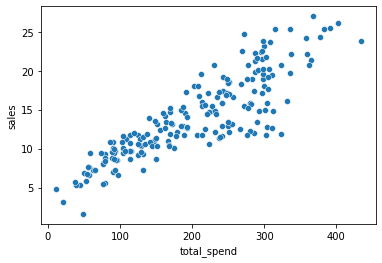

In [6]:
sns.scatterplot(data=df,x="total_spend",y="sales")

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

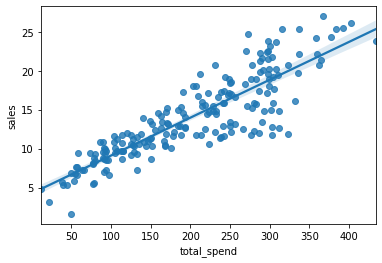

In [7]:
sns.regplot(data=df,x="total_spend",y="sales")

In [8]:
X=df['total_spend']
y=df["sales"]

In [9]:
#y=mx+b
#y=B1x+B0

In [10]:
np.polyfit(X,y,deg=1)

array([0.04868788, 4.24302822])

In [11]:
potential_spend=np.linspace(0,500,100)

In [12]:
predicted_sales=0.04868788*potential_spend+4.24302822

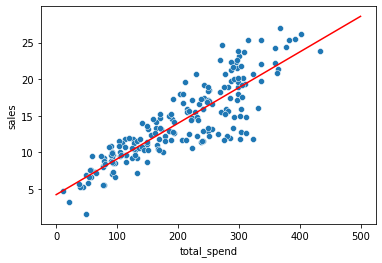

In [13]:
sns.scatterplot(x="total_spend",y="sales",data=df)
plt.plot(potential_spend,predicted_sales,color="red")

In [14]:
spend=200

predicted_sales=0.04868788*spend+4.24302822

In [15]:
predicted_sales

13.98060422

In [16]:
np.polyfit(X,y,3) #X^3 ,X^2

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [17]:
#y = B1x + B0

#y = B3x**3 + B2x**2 + B1x + B0

In [18]:
pot_spend=np.linspace(0,500,100)

In [19]:
pred_sales=3.07615033e-07*pot_spend**3 + -1.89392449e-04*pot_spend**2 + 8.20886302e-02*pot_spend + 2.70495053e+00

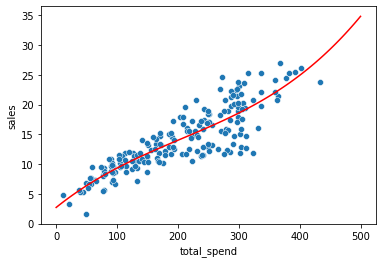

In [20]:
sns.scatterplot(x="total_spend",y="sales",data=df)
plt.plot(pot_spend,pred_sales,color="red")

## Scikit-Learn 

### Data Setup and Model Training

In [21]:
df=pd.read_csv("Advertising.csv")

In [22]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


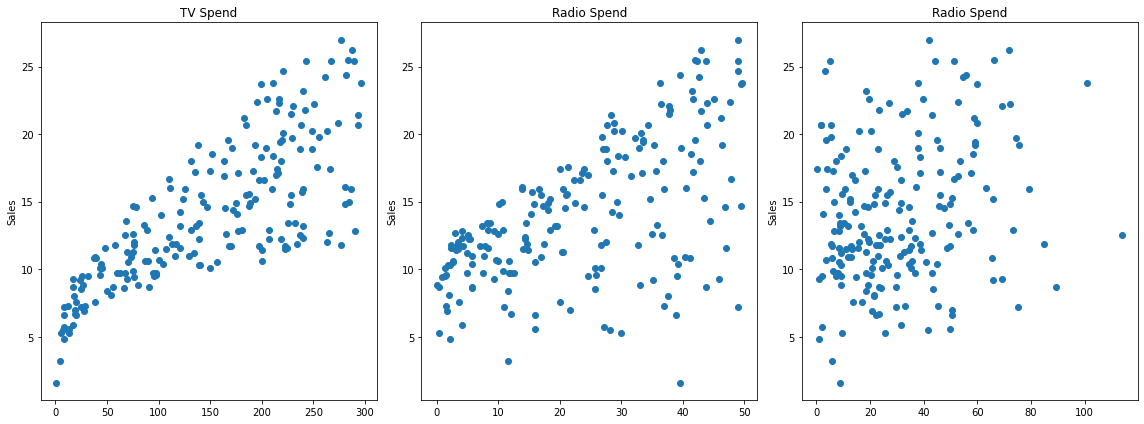

In [23]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df["sales"],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"],df["sales"],'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Radio Spend")

plt.tight_layout();

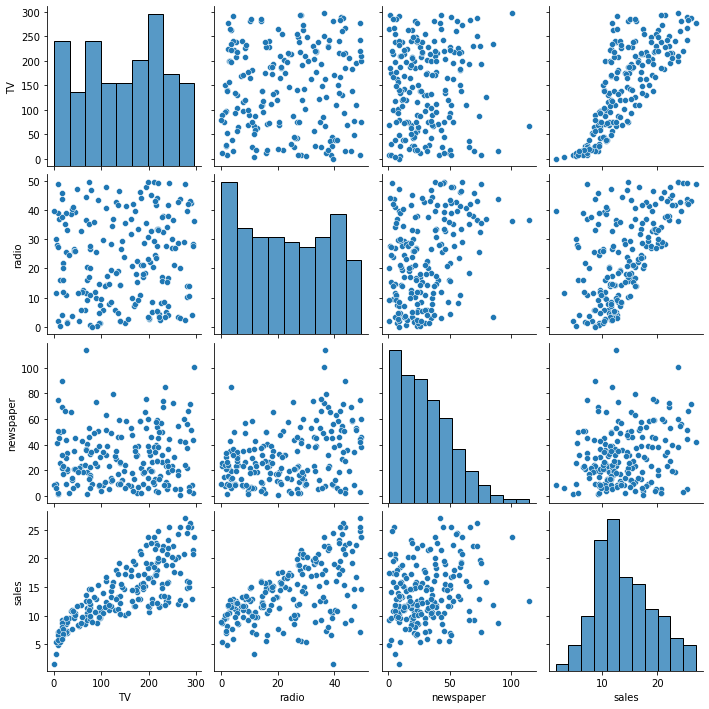

In [24]:
sns.pairplot(df)

In [25]:
X=df.drop("sales",axis=1)

In [26]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [27]:
y=df['sales']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [30]:
len(df)

200

In [31]:
X_train

,TV,radio,newspaper
42,293.6,27.7,1.8
189,18.7,12.1,23.4
90,134.3,4.9,9.3
136,25.6,39.0,9.3
51,100.4,9.6,3.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [32]:
y_train

42     20.7
189     6.7
90     11.2
136     9.5
51     10.7
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 134, dtype: float64

In [33]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
...,...,...,...
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5


In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model=LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.predict(X_test)

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

### Regresion Metrics

In [38]:
#MAE-Mean Absolute Error |y-yi|
#MSE-Mean Squared Error (y-yi)**2
#RMSE-Root Mean Squared Error (-yi)**2 --karekök

In [39]:
test_predictions=model.predict(X_test)

In [40]:
X_test.head()

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2


In [41]:
y_test.head()

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
Name: sales, dtype: float64

In [42]:
test_predictions

array([16.58673085, 21.18622524, 21.66752973, 10.81086512, 22.25210881,
       13.31459455, 21.23875284,  7.38400509, 13.43971113, 15.19445383,
        9.01548612,  6.56945204, 14.4156926 ,  8.93560138,  9.56335776,
       12.10760805,  8.86091137, 16.25163621, 10.31036304, 18.83571624,
       19.81058732, 13.67550716, 12.45182294, 21.58072583,  7.67409148,
        5.67090757, 20.95448184, 11.89301758,  9.13043149,  8.49435255,
       12.32217788,  9.99097553, 21.71995241, 12.64869606, 18.25348116,
       20.17390876, 14.20864218, 21.02816483, 10.91608737,  4.42671034,
        9.59359543, 12.53133363, 10.14637196,  8.1294087 , 13.32973122,
        5.27563699,  9.30534511, 14.15272317,  8.75979349, 11.67053724,
       15.66273733, 11.75350353, 13.21744723, 11.06273296,  6.41769181,
        9.84865789,  9.45756213, 24.32601732,  7.68903682, 12.30794356,
       17.57952015, 15.27952025, 11.45659815, 11.12311877, 16.60003773,
        6.90611478])

In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [44]:
df['sales'].mean()

14.0225

<AxesSubplot:xlabel='sales', ylabel='Count'>

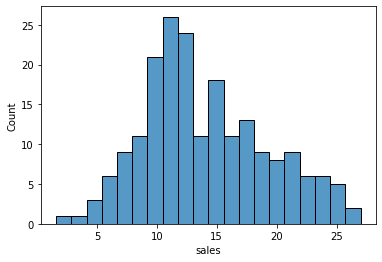

In [45]:
sns.histplot(data=df,x="sales",bins=20)

In [46]:
mean_absolute_error(y_test,test_predictions)

1.4937750024728969

In [47]:
#RMSE
np.sqrt(mean_squared_error(y_test,test_predictions))

1.93078438223472

In [48]:
test_residuals=y_test-test_predictions

In [49]:
test_residuals

95     0.313269
15     1.213775
30    -0.267530
158   -3.510865
128    2.447891
         ...   
97     0.220480
31     0.443402
12    -1.923119
35    -3.800038
119   -0.306115
Name: sales, Length: 66, dtype: float64

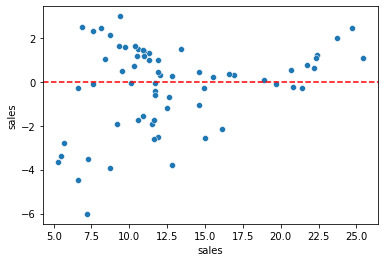

In [50]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='r',ls='--')

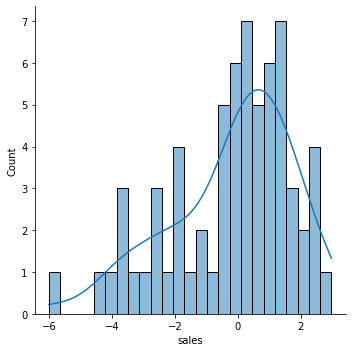

In [51]:
sns.displot(test_residuals,bins=25,kde=True)

In [52]:
import scipy as sp

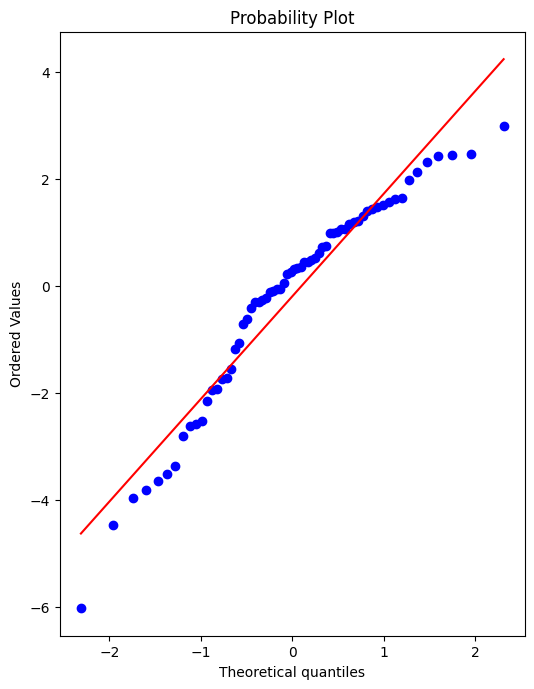

In [53]:
fig,ax=plt.subplots(figsize=(6,8),dpi=100)
_=sp.stats.probplot(test_residuals,plot=ax)

## Model Deployment

In [54]:
final_model=LinearRegression()

In [55]:
final_model.fit(X,y)

LinearRegression()

In [56]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [57]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [58]:
y_hat=final_model.predict(X)

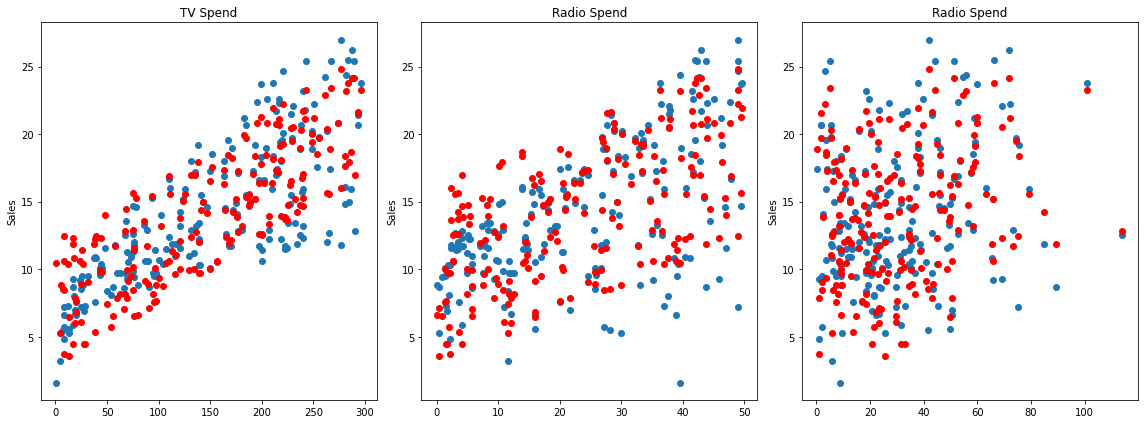

In [59]:
fig,axes=plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df["TV"],df["sales"],'o')
axes[0].plot(df["TV"],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df["radio"],df["sales"],'o')
axes[1].plot(df["radio"],y_hat,'o',color='red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df["newspaper"],df["sales"],'o')
axes[2].plot(df["newspaper"],y_hat,'o',color='red')
axes[2].set_ylabel("Sales")
axes[2].set_title("Radio Spend")

plt.tight_layout();

In [60]:
from joblib import dump,load

In [61]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [62]:
loaded_model=load('final_sales_model.joblib')

In [63]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [64]:
X.shape

(200, 3)

In [65]:
#149 Tv,22 Radio,12 Newspaper
#Sales?
campaign=[[149,22,12]]

In [66]:
loaded_model.predict(campaign)

array([13.893032])